In [ ]:
!pip install opencv-python-headless

Saving tree.jpg to tree (5).jpg


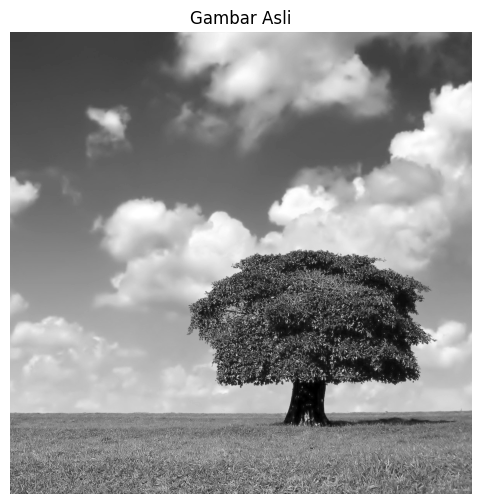

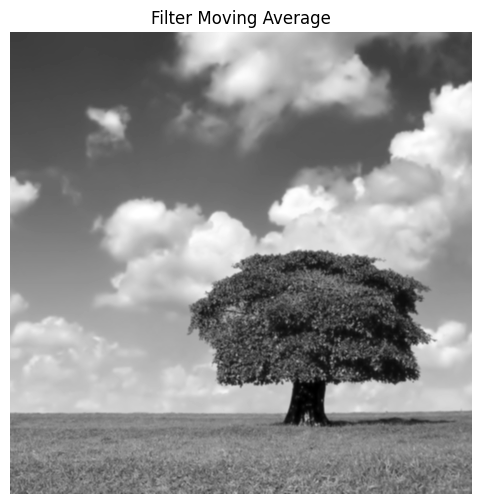

In [ ]:
# Import library yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from google.colab import files

# Fungsi untuk menampilkan gambar
def display_image(title, image, cmap='gray'): # title: judul gambar yang akan ditampilkan, image: data gambar yang akan ditampilkan, dan cmap: palet warna untuk menampilkan gambar, default adalah 'gray' (grayscale).
    plt.figure(figsize=(8, 6)) # Membuat figur baru menggunakan matplotlib dengan ukuran 8x6 inci.
    plt.title(title) # Menambahkan judul pada figur sesuai dengan nilai parameter title.
    plt.imshow(image, cmap=cmap) # Menampilkan gambar menggunakan data image dan palet warna cmap.
    plt.axis('off') # Menyembunyikan sumbu pada gambar agar tampilannya lebih bersih.
    plt.show() # Menampilkan gambar pada layar.

# Unggah file dari komputer lokal
uploaded = files.upload()

# Membaca nama file yang diunggah
image_path = list(uploaded.keys())[0]

# Membaca gambar dalam format grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError("Gambar tidak ditemukan atau format tidak valid. Pastikan gambar dalam format yang didukung (misalnya JPG, PNG).")

# Memanggil fungsi display_image untuk menampilkan gambar.
display_image("Gambar Asli", image)

# --- Filter Moving Average ---
def moving_average_filter(image, kernel_size=5): # image: gambar input yang akan difilter dan kernel_size: ukuran kernel filter (default 5x5).
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size ** 2) # Kernel diisi dengan nilai 1/(kernel_size**2), sehingga elemen-elemen kernel memiliki total 1 (normalisasi).
    filtered_image = cv2.filter2D(image, -1, kernel) # image: gambar input yang akan difilter, -1: kedalaman output yang sama dengan input, dan kernel: kernel yang telah didefinisikan sebelumnya.
    return filtered_image # Mengembalikan gambar hasil filter.

# Menerapkan filter rata-rata bergerak pada gambar.
filtered_image = moving_average_filter(image)

# Menampilkan gambar hasil filter.
display_image("Filter Moving Average", filtered_image)

# Analisis:
# Gambar menjadi lebih halus, mengurangi noise dan detail kecil.

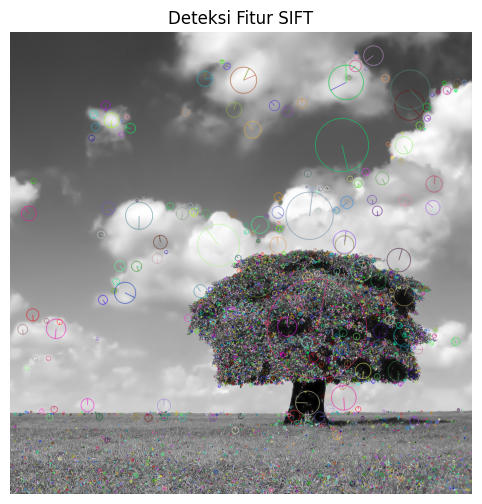

In [ ]:
# --- Deteksi Fitur dengan SIFT ---
sift = cv2.SIFT_create()  # Membuat objek SIFT (Scale-Invariant Feature Transform) untuk deteksi fitur.
keypoints, descriptors = sift.detectAndCompute(image, None) # Mendeteksi keypoint (titik fitur) dan menghitung deskriptor untuk gambar.
sift_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # image: gambar input, keypoints: daftar keypoint yang terdeteksi, None: tidak menyimpan hasil dalam gambar lain, hanya menampilkan, dan flags: menggambar keypoint dengan visualisasi ukuran dan orientasi (rich keypoints).
display_image("Deteksi Fitur SIFT", sift_image) # Menampilkan gambar dengan keypoint yang ditandai menggunakan fungsi 'display_image'.

# Analisis:
# Titik-titik kunci (keypoints) menunjukkan fitur menonjol, seperti sudut atau ujung.

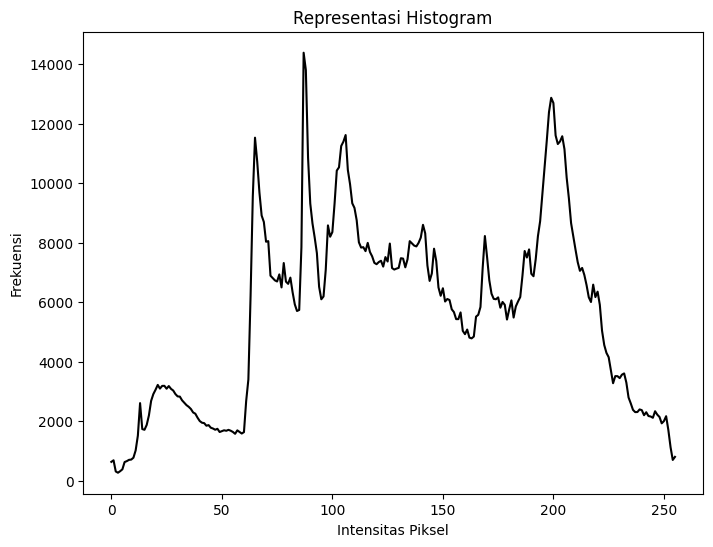

In [ ]:
# --- Representasi Histogram Gambar ---
def plot_histogram(image):
    histogram, bins = np.histogram(image.flatten(), bins=256, range=[0, 256]) # image.flatten(): mengubah gambar 2D menjadi array 1D, bins=256: membagi intensitas piksel menjadi 256 interval (0-255), dan range=[0, 256]: rentang nilai intensitas piksel yang dihitung.
    plt.figure(figsize=(8, 6)) # Membuat figur baru dengan ukuran 8x6 inci.
    plt.title("Representasi Histogram") # Memberikan judul pada grafik histogram.
    plt.plot(histogram, color='black') # Memplot histogram menggunakan garis berwarna hitam.
    plt.xlabel("Intensitas Piksel") # Menambahkan label pada sumbu X untuk menunjukkan intensitas piksel.
    plt.ylabel("Frekuensi") # Menambahkan label pada sumbu Y untuk menunjukkan jumlah kemunculan piksel dengan intensitas tertentu.
    plt.show() # Menampilkan grafik histogram.
plot_histogram(image) # Memanggil fungsi untuk memplot histogram dari gambar image.

# Analisis:
# Histogram menunjukkan distribusi intensitas piksel dalam gambar.

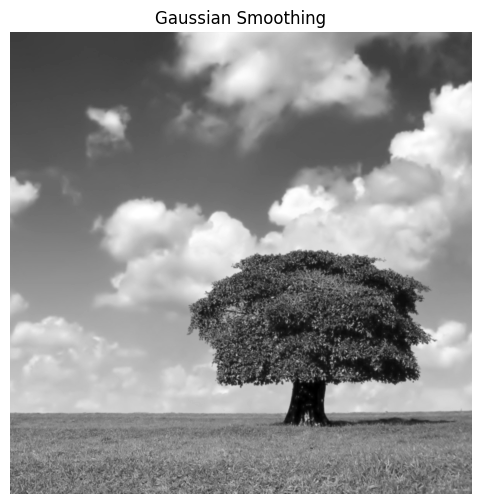

In [ ]:
# --- Gaussian Smoothing ---
def gaussian_smoothing(image, kernel_size=5, sigma=1.0): # image: gambar input yang akan di-blur, kernel_size: ukuran kernel Gaussian, default 5x5, dan sigma: deviasi standar Gaussian, default 1.0.
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma) # image: gambar input, (kernel_size, kernel_size): ukuran kernel Gaussian (harus ganjil), dan sigma: parameter sigma untuk mengontrol tingkat blur.

# Menerapkan Gaussian smoothing pada gambar.
gaussian_image = gaussian_smoothing(image)

# Menampilkan gambar hasil Gaussian smoothing.
display_image("Gaussian Smoothing", gaussian_image)

# Analisis:
# Gaussian smoothing mengurangi noise tetapi menjaga kontur objek lebih baik daripada filter rata-rata bergerak.

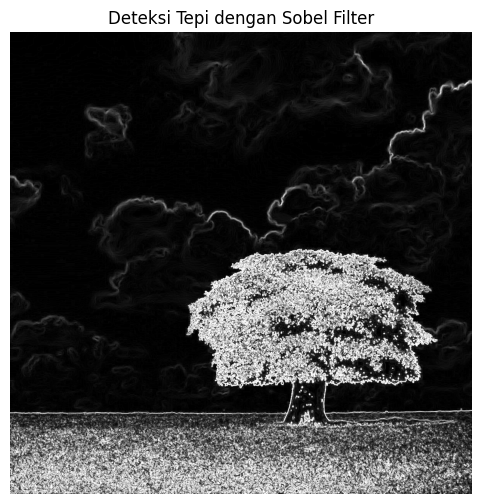

In [ ]:
# --- Deteksi Tepi dengan Sobel Filter ---
def sobel_edge_detection(image):
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3) # cv2.CV_64F: tipe data keluaran (64-bit floating point), 1, 0: filter Sobel untuk menghitung gradien di arah x (1) dan y (0), dan ksize=3: ukuran kernel Sobel (3x3).
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3) # 0, 1: filter Sobel untuk menghitung gradien di arah x (0) dan y (1).
    magnitude = cv2.magnitude(grad_x, grad_y) # Menghitung besar gradien (magnitude) dengan menggabungkan gradien di arah x dan y.
    return cv2.convertScaleAbs(magnitude) # Fungsi 'convertScaleAbs' mengubah nilai menjadi positif dan dalam rentang [0, 255].

# Menerapkan deteksi tepi Sobel pada gambar.
sobel_image = sobel_edge_detection(image)

# Menampilkan gambar hasil deteksi tepi menggunakan filter Sobel.
display_image("Deteksi Tepi dengan Sobel Filter", sobel_image)

# Analisis:
# Sobel mendeteksi tepi dengan menghitung magnitudo gradien, menunjukkan batas-batas objek.

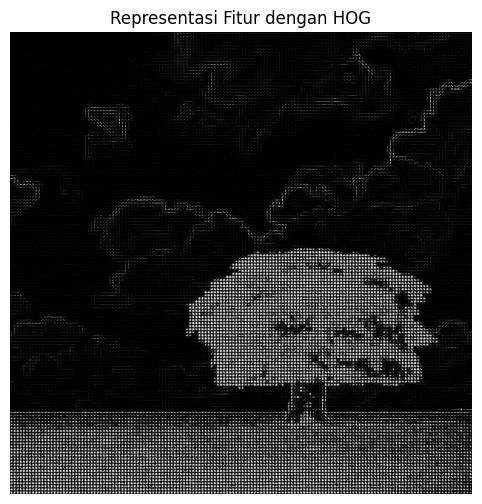

In [ ]:
# --- Representasi Fitur dengan Histogram of Oriented Gradients (HOG) ---
def hog_feature_representation(image):
    features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                               cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys') # orientations=9: jumlah orientasi (bins) untuk histogram gradien, pixels_per_cell=(8, 8): ukuran sel untuk menghitung gradien
                                                                                            # cells_per_block=(2, 2): ukuran blok yang digunakan untuk normalisasi, visualize=True: menghasilkan gambar HOG untuk visualisasi
                                                                                            # block_norm=L2-Hys: normalisasi blok menggunakan metode L2-Hys.
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) # in_range=(0, 10) mengatur rentang input sebelum pemrosesan intensitas.
    return hog_image_rescaled # Mengembalikan gambar HOG yang telah disesuaikan intensitasnya.

# Menerapkan representasi fitur HOG pada gambar.
hog_image = hog_feature_representation(image)

# Menampilkan gambar hasil representasi fitur HOG.
display_image("Representasi Fitur dengan HOG", hog_image)

# Analisis:
# HOG merepresentasikan struktur gambar menggunakan gradien terorientasi, berguna untuk deteksi objek.